# McCormick Relaxations

Let $w = xy$ with upper and lower bounds on $x$

Given the bounds

$$
\begin{align*}
x_1 \leq x \leq x_2 \\
y_1 \leq y \leq y_2 \\
\end{align*}
$$

the "McCormick envelope" is a convex region satisfying the constraints

$$
\begin{align*}
w & \geq y_1 x + x_1 y - x_1 y_1 \\
w & \geq y_2 x + x_2 y - x_2 y_2 \\
w & \leq y_2 x + x_1 y - x_1 y_2 \\
w & \leq y_1 x + x_2 y - x_2 y_1 \\
\end{align*}
$$



## Example: Flash Calculation

Given $F$ and $z_i$, $i=1,\dots,n$, find $L$, $V$, $x_i$ and $y_i$ such that

$$
\begin{align*}
F z_i & = L x_i + V y_i \\
y_i & = K_i x_i
\end{align*}
$$

$$F z_i = L x_i + V K_i x_i $$

$$\phi = V/F$$

$$z_i = (1 + (K_i - 1)\phi) x_i$$

$$x_i = \frac{z_i}{1 + (K_i - 1)\phi}$$

The isothermal flash model is given by

$$z_i = x_i + (K_i - 1)\phi x_i$$

where $0 \leq x_i \leq 1$ and $0 \leq \phi \leq 1$

Define $w_i = \phi x_i$

$$
\begin{align*}
w_i & \geq 0 \\
w_i & \geq x - y - 1 \\
w_i & \leq x \\
w_i & \leq \phi
\end{align*}
$$

Text(0.5, 1.0, 'Bilinear function x*y')

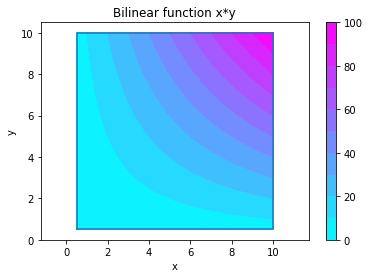

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Rectangle

from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
from matplotlib import style

n = 10

x1, x2 = 0.5, 10
y1, y2 = 0.5, 10
X, Y = np.meshgrid(np.linspace(x1, x2, n+1), np.linspace(y1, y2, n+1))

fig, ax = plt.subplots()
cp = ax.contourf(X, Y, X*Y, cmap=cm.cool, levels=n)
fig.colorbar(cp)

ax.axis('equal')
ax.set_xlim(0, x2 + x1)
ax.set_ylim(0, y2 + y1)
ax.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Bilinear function x*y')

In [86]:
%matplotlib qt

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Rectangle

from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
from matplotlib import style

n = 10

x1, x2 = 0, 1
y1, y2 = 0, 1
X, Y = np.meshgrid(np.linspace(x1, x2, n+1), np.linspace(y1, y2, n+1))

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(10,10))

# surface plot
ax.plot_surface(X, Y, X*Y, alpha=1, cmap=cm.cool)
ax.plot_wireframe(X, Y, X*Y, lw=.3)

# annotate axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w = x * y')
ax.view_init(elev=20, azim=-10)

# corner points (clockwise a -> b -> c -> d -> a)
a = np.array([x1, y1, x1*y1])
b = np.array([x1, y2, x1*y2])
c = np.array([x2, y2, x2*y2])
d = np.array([x2, y1, x2*x1])

def plot_line(a, b, color='r'):
    ax.plot3D([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], lw=4, color=color, solid_capstyle="round")
    
# four edges
plot_line(a, b)
plot_line(b, c)
plot_line(c, d)
plot_line(d, a)

# catty corners
plot_line(b, d)
plot_line(a, c)

def show_surf(a, b, c):
    x = np.array([a[0], b[0], c[0]])
    y = np.array([a[1], b[1], c[1]])
    z = np.array([a[2], b[2], c[2]])
    ax.plot_trisurf(x, y, z, alpha=0.2)

show_surf(a, b, c)
show_surf(a, b, d)
show_surf(a, c, d)
show_surf(b, c, d)

plot_line([x1, y1, 0], a, 'k')
plot_line([x1, y2, 0], b, 'k')
plot_line([x2, y2, 0], c, 'k')
plot_line([x2, y1, 0], d, 'k')

#

In [85]:
import pyomo.environ as pyo

m = pyo.ConcreteModel()

m.F = pyo.Var(domain=pyo.NonNegativeReals)
m.V = pyo.Var(domain=pyo.NonNegativeReals)
m.L = pyo.Var(domain=pyo.NonNegativeReals)

